# SPACEc: ML-enabled cell type annotation

After preprocessing the single-cell data, the next step is to assign cell types. SPACEc utilizes the linear SVM model to train and classify to annotate cell types if training data is available.

## Set up environment

In [1]:
# silencing warnings
import warnings
warnings.filterwarnings('ignore')

#import standard packages
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import scipy as sp
import numpy as np

data_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/' # where the data is stored
code_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/pipeline_test_112023/src' # current where the code is stored, this will be replaced by pip install soon
output_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/output_112023/' #where you want to store the output

if not os.path.exists(output_dir): # check if output path exist - if not generate the path
    os.makedirs(output_dir)
    
sys.path.append(code_dir) 

from helperfunctions_hf import * # Helper functions - used by other functions to execute steps like table formatting etc. KEY: hf
from preprocessing_pp import * # Preprocessing functions - to normalize and prepare data for further analysis KEY: pp
from tools_tl import * # tools - perform calculation on the data KEY: tl
from plot_pl import * # plotting functions - used to visualize results KEY: pl

sc.settings.set_figure_params(dpi=80, facecolor='white')

## Data Explanation
Annotated tonsil data is used as training & test data. </br>
Tonsillitis data is used as validation data.

In [2]:
# Load training data
adata = sc.read(output_dir + "adata_nn_demo_annotated.h5ad")
adata_train = adata[adata.obs['condition'] == 'tonsil']
adata_val  = adata[adata.obs['condition'] == 'tonsillitis']

## 3.1 Training

Training now!
Evaluating now!


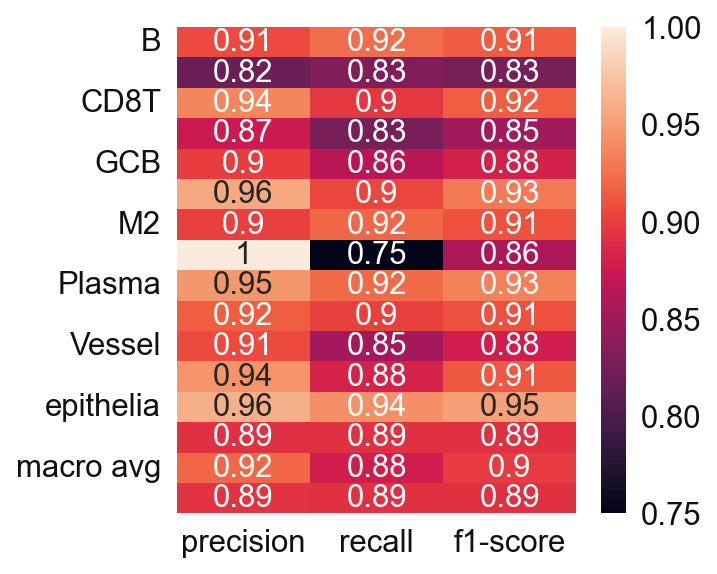

In [3]:
svc = tl_ml_train(adata_train=adata_train,
                  label = 'celltype'
                 )

In [4]:
tl_ml_predict(adata_val = adata_val,
             svc = svc,
              save_name = "svm_pred")

Classifying!
Saving cell type labels to adata!


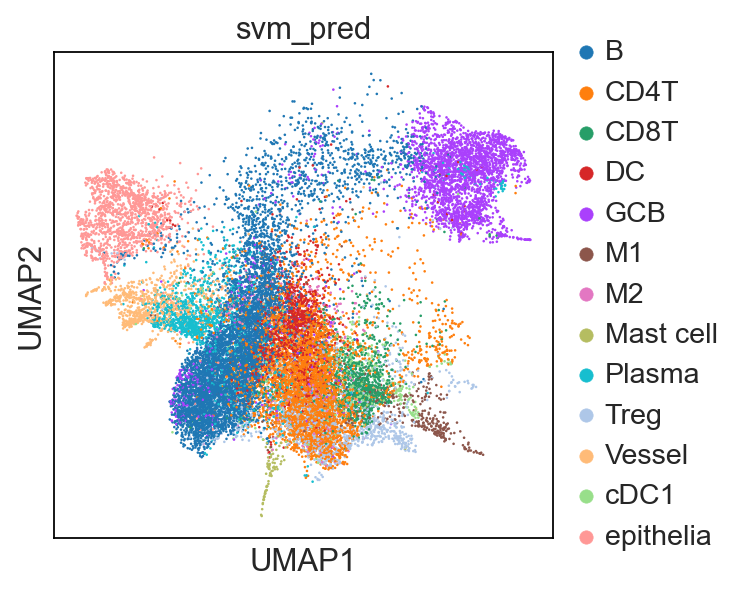

In [5]:
sc.pl.umap(adata_val, color = 'svm_pred')

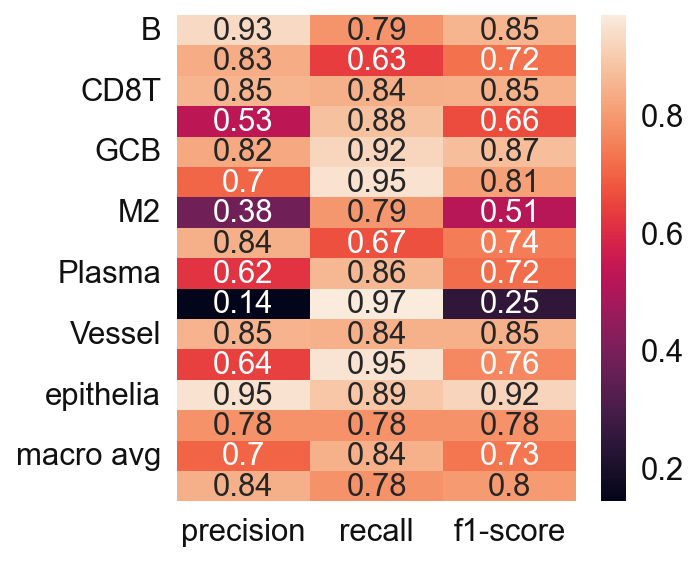

In [6]:
# Since we also know the cell type annotation of the adata_val, we can check in this case
svm_eval = classification_report(y_true = adata_val.obs['celltype'].values, 
                                 y_pred = adata_val.obs['svm_pred'].values, 
                                 target_names=svc.classes_, output_dict=True)
sns.heatmap(pd.DataFrame(svm_eval).iloc[:-1, :].T, annot=True)
plt.show()

### 3.4 Save model

In [7]:
import pickle
filename = 'svc_model.sav'
pickle.dump(svc, open(output_dir + file_name, 'wb'))
#adata_val.write(output_dir + "adata_nn_ml_demo_annotated.h5ad")

## 3.5 Single-cell visualzation

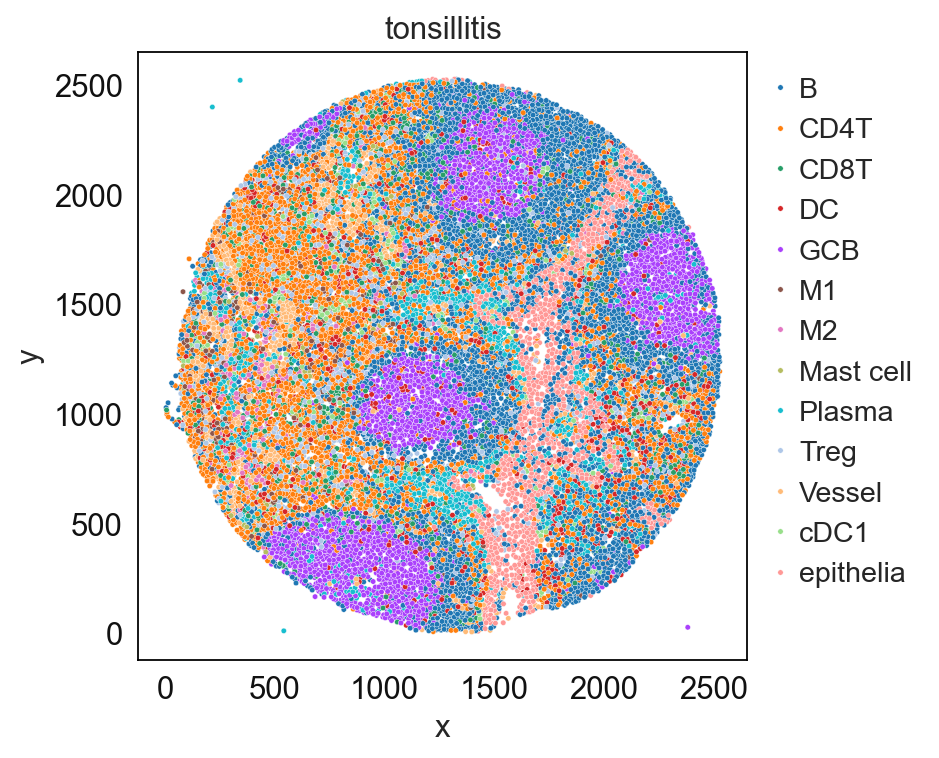

In [8]:
pl_catplot_ad(adata_val, color = "svm_pred", # specify group column name here (e.g. celltype_fine)
               unique_region = "condition", # specify unique_regions here
               X='x', Y='y', # specify x and y columns here
               n_columns=1, # adjust the number of columns for plotting here (how many plots do you want in one row?)
               palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
               savefig=False, # save figure as pdf
               output_fname = "", # change it to file name you prefer when saving the figure
               output_dir=output_dir, # specify output directory here (if savefig=True)
             )

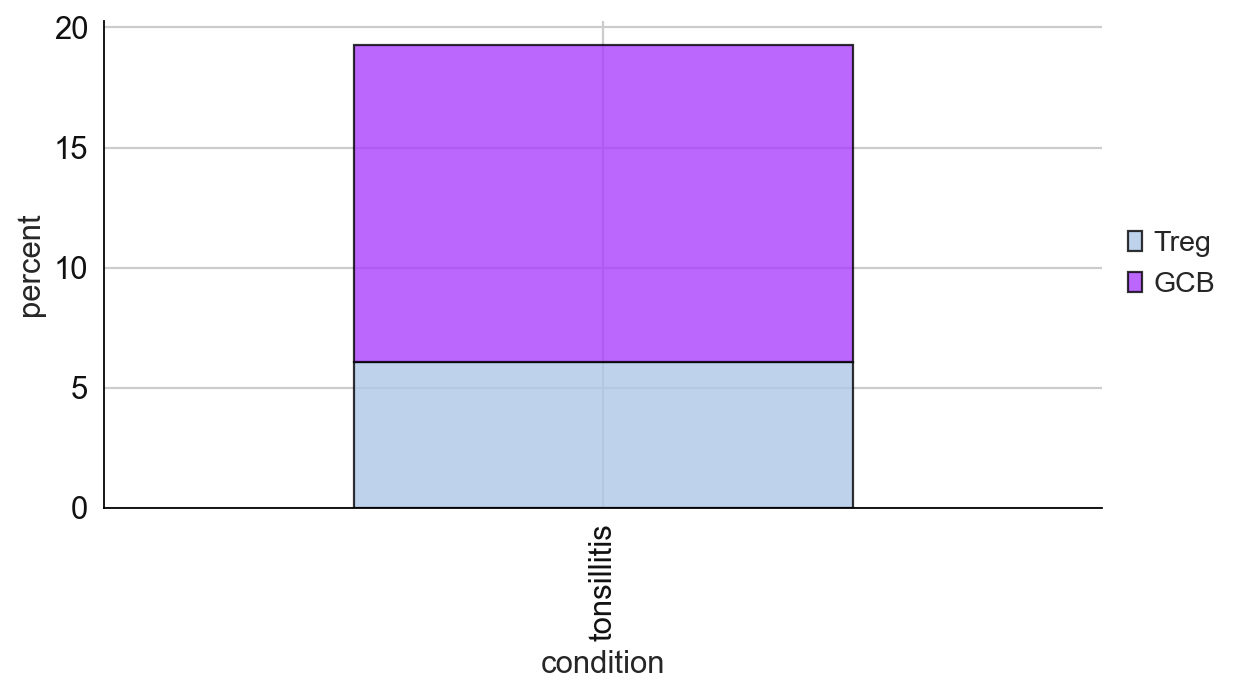

In [9]:
# cell type percentage tab and visualization [much few]
ct_perc_tab, _ = pl_stacked_bar_plot_ad(adata = adata_val, # adata object to use 
                      color = 'svm_pred', # column containing the categories that are used to fill the bar plot
                      grouping = 'condition', # column containing a grouping variable (usually a condition or cell group) 
                      cell_list = ['GCB', 'Treg'],  # list of cell types to plot, you can also see the entire cell types adata.obs['celltype_fine'].unique()
                      palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
                      savefig=False, # change it to true if you want to save the figure
                      output_fname = "", # change it to file name you prefer when saving the figure
                      output_dir = output_dir, #output directory for the figure
                      norm = False # if True, then whatever plotted will be scaled to sum of 1
                    ) 

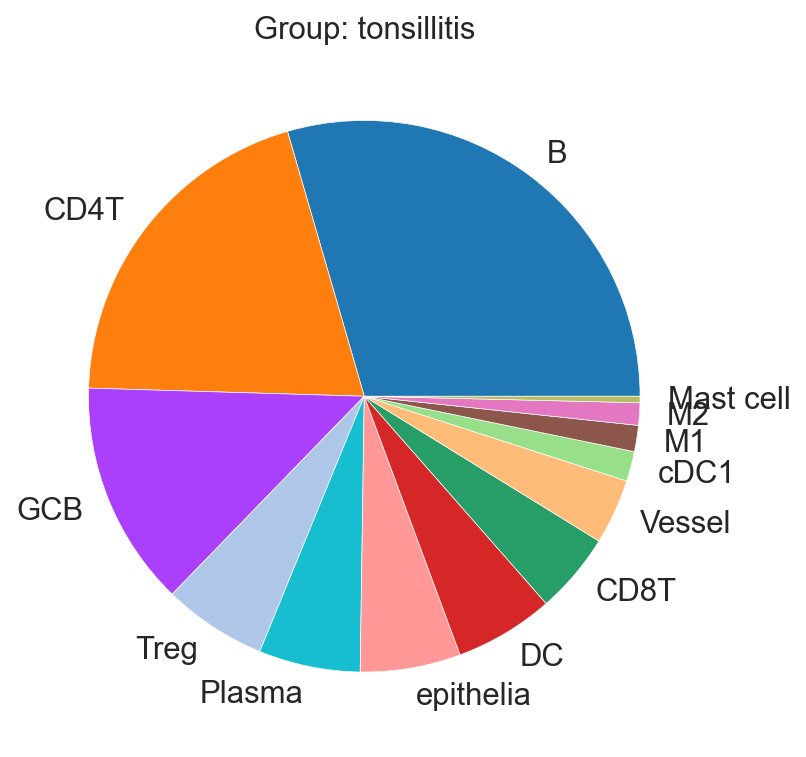

In [10]:
pl_create_pie_charts_ad(adata_val,
                        color = "svm_pred", 
                        grouping = "condition", 
                        show_percentages=False,
                        palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
                        savefig=False, # change it to true if you want to save the figure
                        output_fname = "", # change it to file name you prefer when saving the figure
                        output_dir = output_dir #output directory for the figure
                       )